In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.svm import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading dataset and reading the first few columns
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#  Check the number of rows and columns in the dataset
df.shape

(768, 9)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. italicized text italicized text

# Get basic statistics - gives statistics of only numerical col

In [4]:
# Get basic statistics - gives statistics of only numerical columns in the dataset. 
#714 columns for age indicates missing values in age column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The above dataframe describes all key information in the dataset. I have made a few google searches to gain some domain knowledge. This is mainly to identify any outlier or inconsistent values in the dataset. As per the secondary research, Skin Thickness COlumn has outliers since max values are seen as 99 while average values among Indian women ranges from 18-22 for tricep area.

Below are the counts of 0 values for Glucose, BP and BMI. As seen, Glucose and BMI has 5 and 11 0 values resp. and apart from these values, the distributions in the graphs are gaussian. We can later correct these 0 values to have normal distributions for both. Blood Pressure has 35 0 values and I will not adjust these 0 values. italicized text


In [5]:
df.groupby('Glucose').size()

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64

In [6]:
df.groupby('BloodPressure').size()

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
dtype: int64

In [7]:
df.groupby('BMI').size()

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Length: 248, dtype: int64

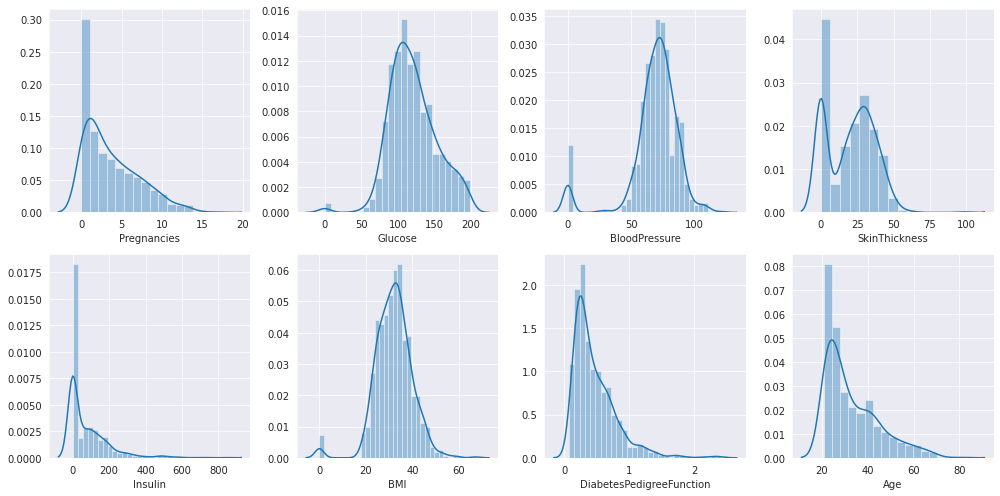

In [8]:
sns.set_style('darkgrid')
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
n_rows = 2
n_cols = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()


Checking the distributions of all column data to identify the distribution type and outliers if any.

The graphs for Glucose, Blood Pressure and BMI shows 0 values. Most of the distributions do not follow Gussian distribution and shows signs of positive skewness and kurtosis

Now I will further check for outlier distributions and quartile quartile distributions. I already have an idea of the outliers as mentioned above 


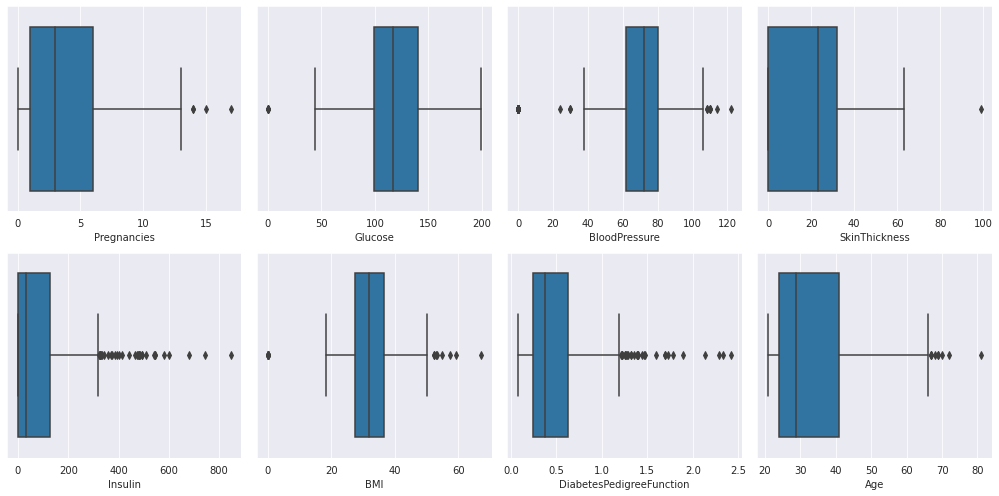

In [9]:
sns.set_style('darkgrid')
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
n_rows = 2
n_cols = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

The box plots for Glucose and BMI clearcly shows the distributions of majority data lying between 100-140 for Glucose and 25-35 for BMI. BMI also has outliers in the right quartile, and their numbers are high. I will treat the Glucose and BMI columns for 0 values since there are few.

Before I do that, lets also check the outcome across features using pairplot


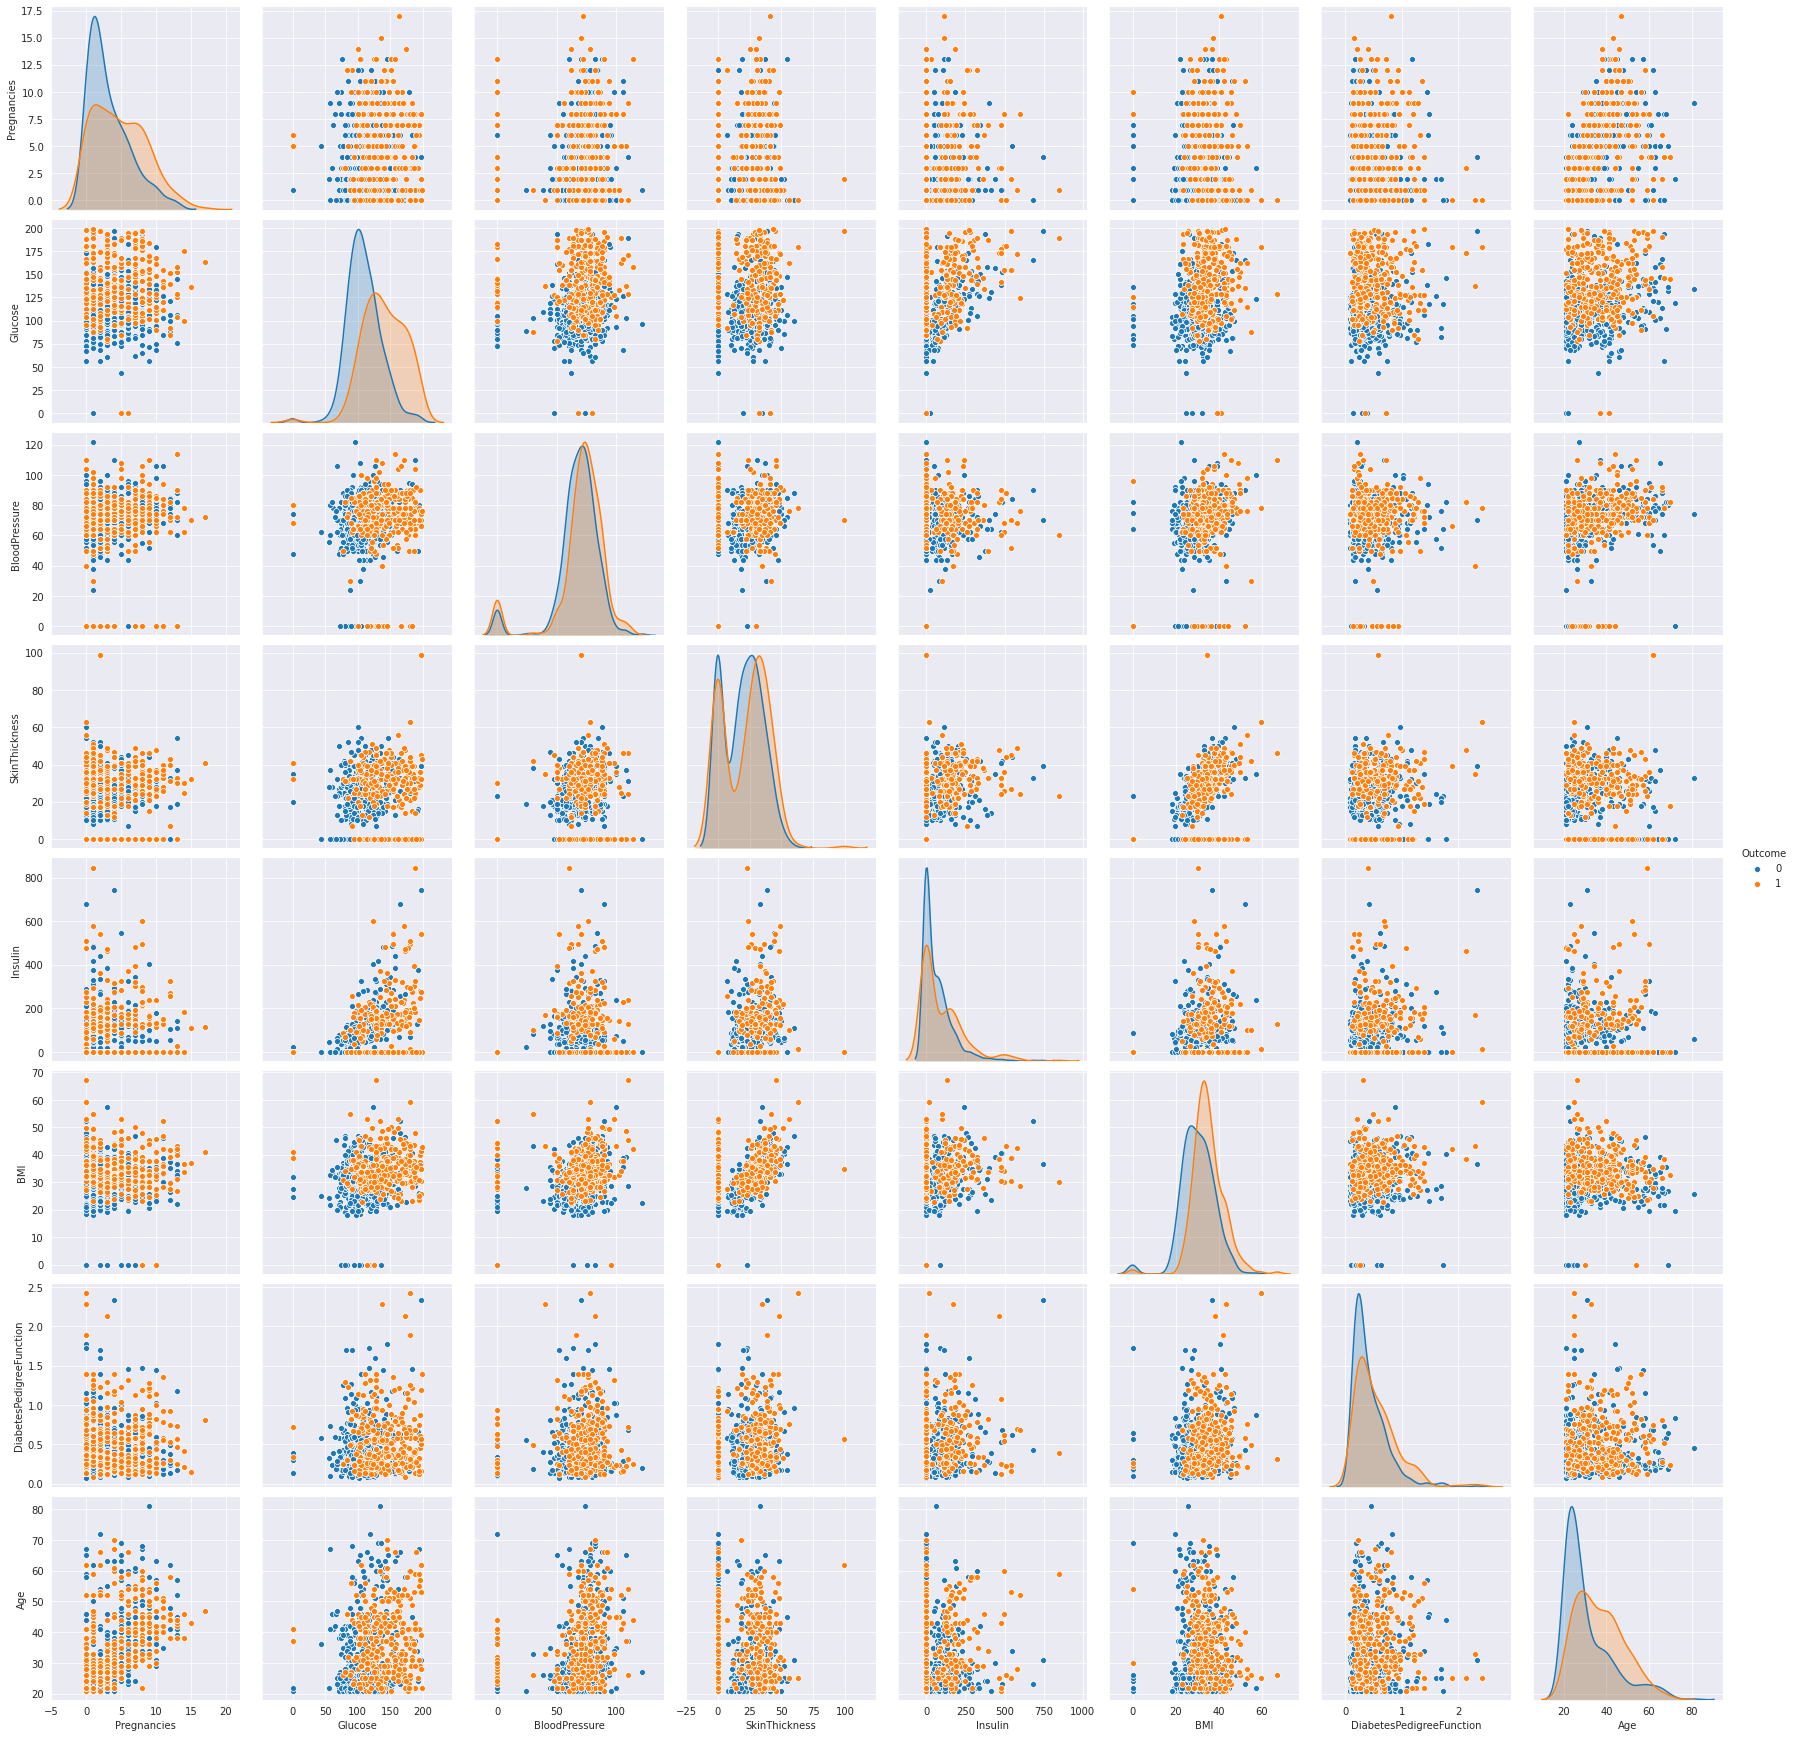

<Figure size 720x720 with 0 Axes>

In [10]:
sns.pairplot(df, height = 3, hue = 'Outcome', diag_kind = 'kde')
plt.figure(figsize=(10,10))
plt.show()

The above pairplots shows how the outcomes have varied based on different features. To get the exact correlation or dependency on a partifular feature, I will check for correlation below. The below correlation matrix shows Glucose, BMI and Pregnency to be highly correlated with the outcome.I will also visualize the same using a heatmap.

In [11]:

df_correlation = df.corr()
df_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


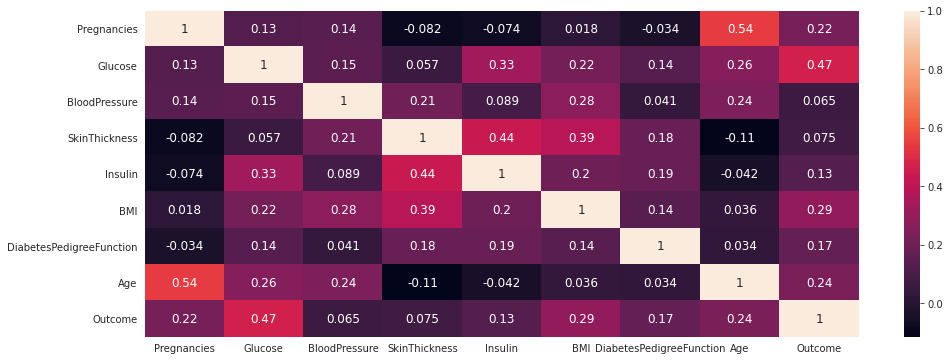

In [12]:
fig, ax = plt.subplots(figsize = (16,6))
sns.heatmap(df_correlation, annot = True, annot_kws= {'size': 12})

The correlation heatmap shows 4 main correlated features to outcome, Age, BMI, Glucose, Pregnancies. However, Pregnancy and Age are highly correlated and will result in co-linearity. Since no particular feature shows high correlation, I will not perform feature selection, and will continue with the existing features to run prediction models

Before we do that, important data processing is needed. I am replacing 0 values in Glucose, BMI, Blood Pressure, Insulin and SKinTHickness with its mean values. However, mean values are added in below code separately for people with Diabetes and people without since these features are important contributors to diabetes.

In [13]:
filt1=(df['Outcome']==0)&(df['Glucose']==0)
filt2=(df['Outcome']==1)&(df['Glucose']==0)
df.loc[filt1,'Glucose']=110
df.loc[filt2,'Glucose']=141

filt1=(df['Outcome']==0)&(df['BloodPressure']==0)
filt2=(df['Outcome']==1)&(df['BloodPressure']==0)
df.loc[filt1,'BloodPressure']=68
df.loc[filt2,'BloodPressure']=71

filt1=(df['Outcome']==0)&(df['SkinThickness']==0)
filt2=(df['Outcome']==1)&(df['SkinThickness']==0)
df.loc[filt1,'SkinThickness']=20
df.loc[filt2,'SkinThickness']= 22

filt1=(df['Outcome']==0)&(df['Insulin']==0)
filt2=(df['Outcome']==1)&(df['Insulin']==0)
df.loc[filt1,'Insulin']=69
df.loc[filt2,'Insulin']=100

filt1=(df['Outcome']==0)&(df['BMI']==0)
filt2=(df['Outcome']==1)&(df['BMI']==0)
df.loc[filt1,'BMI']=30
df.loc[filt2,'BMI']=37
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100,33.6,0.627,50,1
1,1,85,66,29,69,26.6,0.351,31,0
2,8,183,64,22,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, separating outcome which is the dependent variable and rest of the features which are independent

In [14]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
print("Shape of X :", X.shape)
print("Shape of y :",y.shape)

Shape of X : (768, 8)
Shape of y : (768,)


Spliting the dataset into test and train 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Standardizing the data by using StandardScalar package

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In the below cell, I am defining a function to train any model we need to check


In [38]:
def models(X_train, y_train):
    
    #1st we will use Logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    from sklearn.linear_model import RidgeClassifier
    clf = RidgeClassifier()
    clf.fit(X_train, y_train)
    
    # Using KNeighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    
    # Using SVM (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train,y_train)
    
    # Using SVM (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train,y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,y_train)
    
    #Using Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =0)
    forest.fit(X_train, y_train)

    import xgboost as xgb
    xb = xgb.XGBClassifier(random_state=0)
    xb.fit(X_train,y_train)

    print('[0]Logistic Regression Training Accuracy', log.score(X_train, y_train))
    print('[1]K Nearest Neighbors Regression Training Accuracy', knn.score(X_train, y_train))
    print('[2]SVC Linear Regression Training Accuracy', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Regression Training Accuracy', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian Regression Training Accuracy', gauss.score(X_train, y_train))
    print('[5]Decision Tree Regression Training Accuracy', tree.score(X_train, y_train))
    print('[6]Random Forest Regression Training Accuracy', forest.score(X_train, y_train))
    print('[7]Ridge Classifier Training Accuracy', clf.score(X_train, y_train))  
    print('[8]XGB Classifier Training Accuracy', xb.score(X_train, y_train)) 
      
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, clf,xb

In [39]:
models = models(X_train, y_train)

[0]Logistic Regression Training Accuracy 0.7736156351791531
[1]K Nearest Neighbors Regression Training Accuracy 0.8566775244299675
[2]SVC Linear Regression Training Accuracy 0.7703583061889251
[3]SVC RBF Regression Training Accuracy 0.8517915309446255
[4]Gaussian Regression Training Accuracy 0.749185667752443
[5]Decision Tree Regression Training Accuracy 1.0
[6]Random Forest Regression Training Accuracy 0.996742671009772
[7]Ridge Classifier Training Accuracy 0.7654723127035831
[8]XGB Classifier Training Accuracy 0.9804560260586319


Now I am going to use confusion matrix to check testing accuracy of all the above models

In [40]:
from sklearn.metrics import confusion_matrix

for i in range(len(models)):
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    
    #Extracting TN, FN, TP, FP
    TN, FN, TP, FP = confusion_matrix(y_test, models[i].predict(X_test)).ravel()
    test_score = (TP + TN)/(TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[84 15]
 [21 34]]
Model[0] Testing Accuracy = "0.6818181818181818"

[[77 22]
 [17 38]]
Model[1] Testing Accuracy = "0.6103896103896104"

[[85 14]
 [21 34]]
Model[2] Testing Accuracy = "0.6883116883116883"

[[81 18]
 [22 33]]
Model[3] Testing Accuracy = "0.6688311688311688"

[[81 18]
 [20 35]]
Model[4] Testing Accuracy = "0.6558441558441559"

[[91  8]
 [14 41]]
Model[5] Testing Accuracy = "0.6818181818181818"

[[94  5]
 [14 41]]
Model[6] Testing Accuracy = "0.7012987012987013"

[[85 14]
 [21 34]]
Model[7] Testing Accuracy = "0.6883116883116883"

[[94  5]
 [ 9 46]]
Model[8] Testing Accuracy = "0.6688311688311688"



As clearly seen above, no particular model is performing well on test data. All are weak learners. I will further use voting classifier to combine weak learners to give better results

In [46]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators = [('lr',lr),("tree",tree),('rc',rc)],voting="hard", flatten_transform=True)
vt.fit(X_train,y_train)
vt.score(X_test, y_test)

0.7727272727272727

The voting classifier did improve the test accuracy significantly. However, we can further imporve this. I am using Gradient Boosting Classifier to check if we can imporve on the results further

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state =0)
gb_clf.fit(X_train,y_train)
gb_score = gb_clf.score(X_test,y_test)
gb_score

0.8766233766233766

Gradient Boosting Classifier further imporves the test data accuracy. For additional imporvements, I am also checking for XGB CLassifier, which again enhances our test results.

In [49]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train,y_train)

XGBClassifier()

In [50]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9090909090909091

Printing the performance report for XGB model 

In [52]:
pred = xgb_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.90      0.84      0.87        55

    accuracy                           0.91       154
   macro avg       0.91      0.89      0.90       154
weighted avg       0.91      0.91      0.91       154



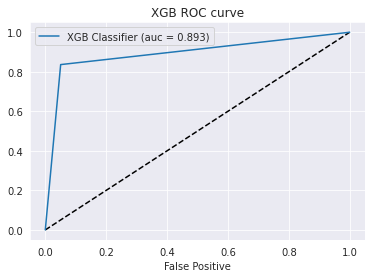

In [55]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_vt = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGB Classifier (auc = %0.3f)'% auc_vt )
plt.xlabel('True Positive Rate')
plt.xlabel('False Positive')
plt.title('XGB ROC curve')
plt.legend()
plt.show()

From all the analysis, processing and model selection, it is clear that XGB model performs the best on the given dataset
